## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
# !nvidia-smi

In [2]:
import os
import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

train, test = cifar10.load_data()

In [3]:
from tensorflow.keras.utils import to_categorical

## 資料前處理
def preproc_x(x, flatten=True):
    x = 2 * (x / 255.0) - 1  # 將資料標準化至 -1 到 1 之間
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = to_categorical(y, num_classes)
    return y   

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16, 8]):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528   

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

C:\Users\user.DESKTOP-2LT8F45\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 3s 13ms/step - loss: 1.9385 - accuracy: 0.3035 - val_loss: 1.7532 - val_accuracy: 0.3831
Epoch 2/100
196/196 [==============================] - 2s 12ms/step - loss: 1.6671 - accuracy: 0.4113 - val_loss: 1.6136 - val_accuracy: 0.4339
Epoch 3/100
196/196 [==============================] - 2s 13ms/step - loss: 1.5418 - accuracy: 0.4563 - val_loss: 1.5463 - val_accuracy: 0.4599
Epoch 4/100
196/196 [==============================] - 2s 12ms/step - loss: 1.4448 - accuracy: 0.4932 - val_loss: 1.5010 - val_accuracy: 0.4768
Epoch 5/100
196/196 [==============================] - 2s 11ms/step - loss: 1.3544 - accuracy: 0.5244 - val_loss: 1.4503 - val_accuracy: 0.5019
Epoch 6/100
196/196 [==============================] - 2s 11ms/step - loss: 1.2675 - accuracy: 0.5534 - val_loss: 1.4229 - val_accuracy: 0.5077
Epoch 7/100
196/196 [==============================] - 2s 12ms/step - loss: 1.1916 - accuracy: 0.5799 - val_loss: 1.4238 - val_accuracy:

Final Validation Loss: 4.585841178894043
Fianl Validation Accuracy: 0.5159000158309937


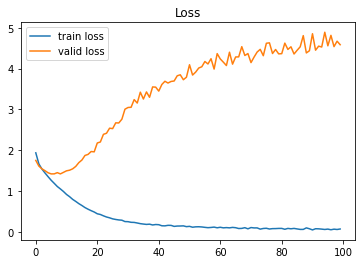

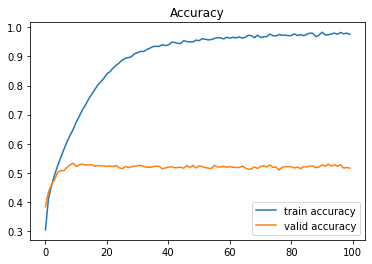

In [9]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
print(f'Final Validation Loss: {valid_loss[-1]}')

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]
print(f'Fianl Validation Accuracy: {valid_acc[-1]}')

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 筆記
### 3層Dense, num_neurons=[512, 256, 128]
* Final Validation Loss: 5.637113094329834
* Fianl Validation Accuracy: 0.5271000266075134 

### 7層Dense, num_neurons=[512, 256, 128, 64, 32, 16, 8]
* Final Validation Loss: 4.585841178894043
* Fianl Validation Accuracy: 0.5159000158309937

### 增加層數 - Accuracy沒有比較高可是loss下降